In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
# Load dataset from sklearn
data = load_breast_cancer()

# View the keys available in the dataset
print("Available keys:", data.keys())

# View feature names (columns)
print("\nFeature names:\n", data.feature_names)

# View target names (classes)
print("\nTarget names (class labels):", data.target_names)

# View class distribution
print("\nClass distribution (counts of 0 and 1):")
print(pd.Series(data.target).value_counts())

# Converting to dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Mapping the targets 
df['target'] = df['target'].map({0: 'Malignant', 1: 'Benign'})


print("\nSample data:")
print(df.head())


Available keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names (class labels): ['malignant' 'benign']

Class distribution (counts of 0 and 1):
1    357
0    212
Name: count, dtype: int64

Sample data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   


In [13]:


# Features and labels
X = data.data
y = data.target  # 0 = malignant, 1 = benign

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Classes:", np.unique(y))


Feature shape: (569, 30)
Target shape: (569,)
Classes: [0 1]


In [14]:
# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [25]:
#building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))
])


C:\Users\User\anaconda3\envs\deepface\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
#Compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [27]:
#model training
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6419 - loss: 0.6694 - val_accuracy: 0.6484 - val_loss: 0.6734
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7301 - loss: 0.5715 - val_accuracy: 0.7692 - val_loss: 0.6093
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7341 - loss: 0.5420 - val_accuracy: 0.8022 - val_loss: 0.5537
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7908 - loss: 0.5132 - val_accuracy: 0.8242 - val_loss: 0.5062
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8010 - loss: 0.4747 - val_accuracy: 0.8571 - val_loss: 0.4668
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8930 - loss: 0.4056 - val_accuracy: 0.8681 - val_loss: 0.4330
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8765 - loss: 0.3976 - val_accuracy: 0.8791 - val_loss: 0.4033
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8824 - loss: 0.3725 - val_accuracy: 0.8791 - val_loss

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9352 - loss: 0.1812

Test Accuracy: 0.95


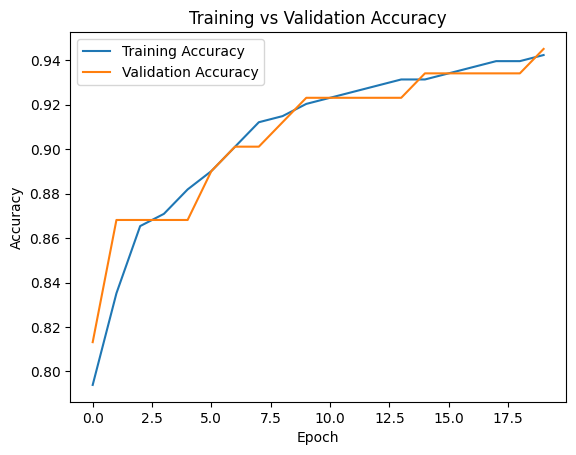

In [19]:
#visualization
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


In [21]:
sample = x_test[5].reshape(1, -1)
pred = model.predict(sample)
predicted_class = int(pred[0][0] > 0.5)

print(f"Predicted probability: {pred[0][0]:.4f}")
print(f"Predicted class: {predicted_class}")
print(f"True label: {y_test[5]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted probability: 0.0002
Predicted class: 0
True label: 0


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


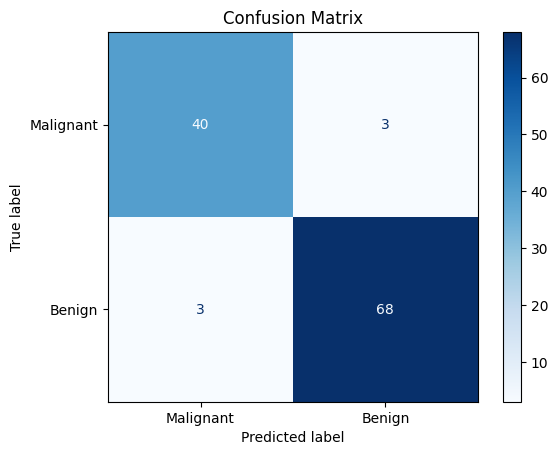

In [23]:
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()